In [1]:
#Importing Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing dataset

df= pd.read_csv("Zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [3]:
#convert data type of column-rate

def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

In [4]:
df['rate']=df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 1.0, 'Majority of Customers Order')

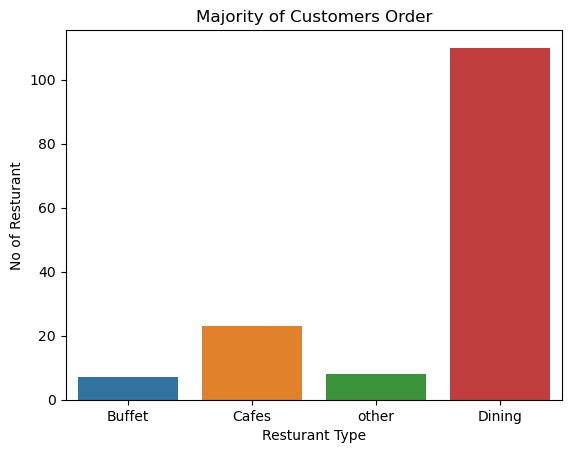

In [6]:
#Q1 resturant type

sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Resturant Type')
plt.ylabel('No of Resturant')
plt.title('Majority of Customers Order')

### Output 1: Majority of the resturant falls in dining category

In [7]:
#Q2


df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [8]:
gd=df.groupby('listed_in(type)')['votes'].sum()
gd

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

Text(0.5, 1.0, 'Restaurants with Max Votes')

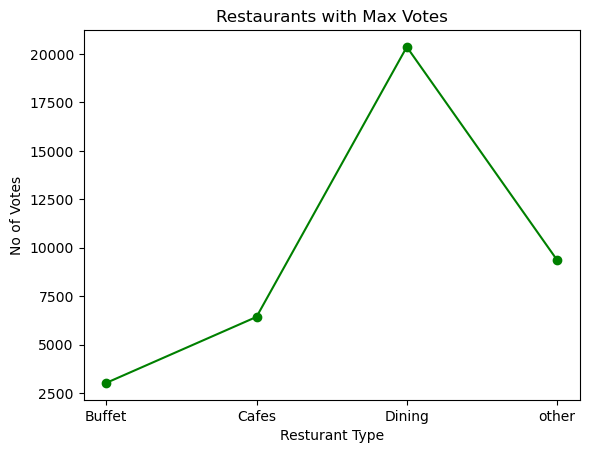

In [9]:
result=pd.DataFrame({'votes':gd})
plt.plot(result,c='green',marker='o')
plt.xlabel('Resturant Type')
plt.ylabel('No of Votes')
plt.title('Restaurants with Max Votes')

### Output 2:Dinning has gained maximum votes

Text(0.5, 1.0, 'Rating Distribution')

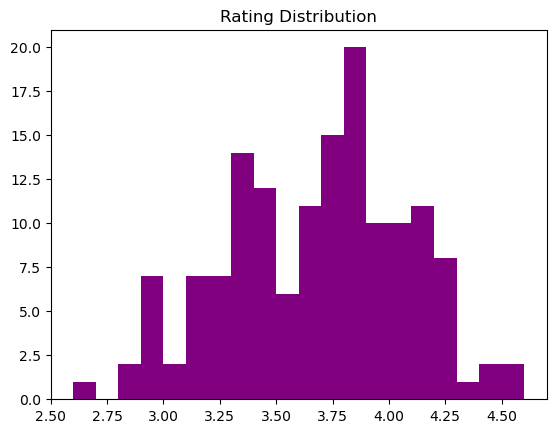

In [10]:
# Q3:


plt.hist(df['rate'],bins=20,color='purple')
plt.title('Rating Distribution')

### Output 3: Majority resturants receives rating 3.5 to 4 which is good

In [11]:
#Q4:

df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


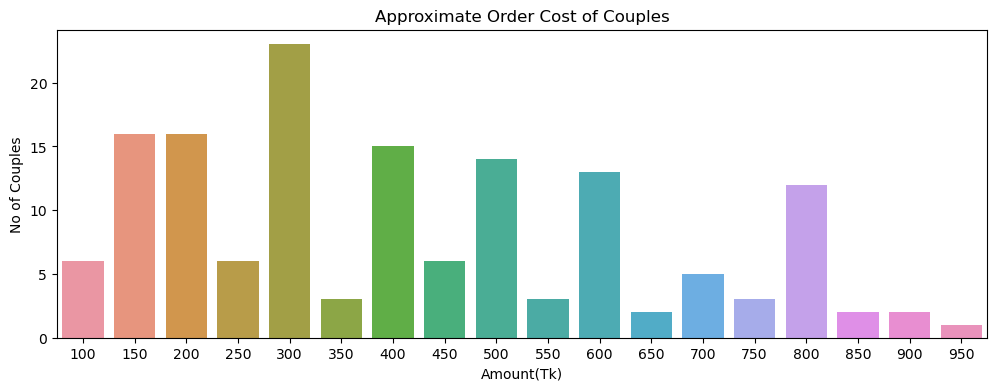

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

cd = df['approx_cost(for two people)']

# Increase figure size
plt.figure(figsize=(12, 4))  # Change width and height as needed

sns.countplot(x=cd)
plt.title('Approximate Order Cost of Couples')
plt.xlabel('Amount(Tk)')
plt.ylabel('No of Couples')
plt.show()

### Output 4:Maximum couple prefers an approximate cost of 300 tk

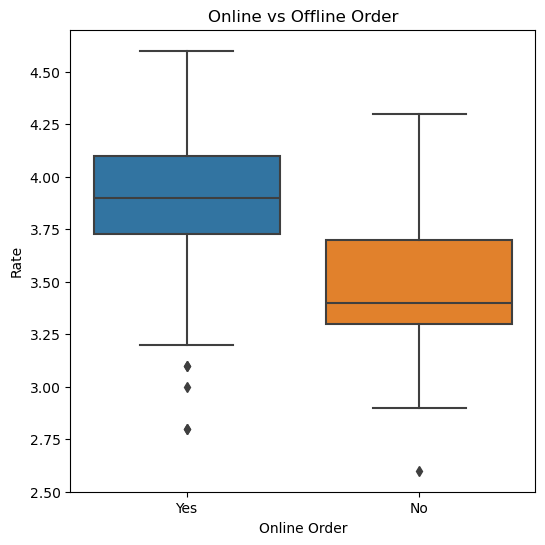

In [13]:
#Q5:

plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)
plt.title('Online vs Offline Order')
plt.xlabel('Online Order')
plt.ylabel('Rate')
plt.show()

### Output 5:Offline order has lower rating than online order

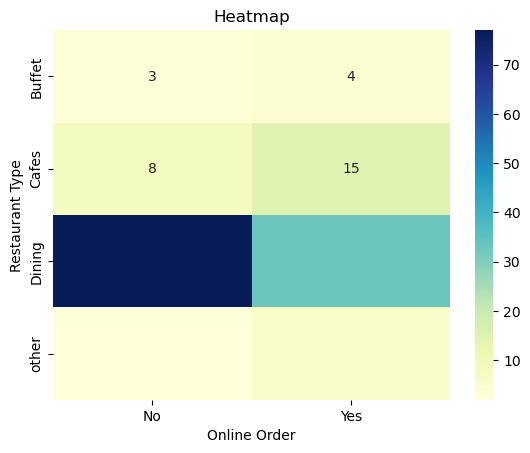

In [14]:
#Q6:

pivot_table=df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Restaurant Type')
plt.show()

### Output 6: Dinning restaurant gets more offline order but cafes primarily gets more online orders.